# Demand Forecasting for Phone Devices in Supply Chain

## Objective
To develop and evaluate machine learning models that can forecast the monthly demand (`Closing Subs Monthly`) of phone devices across multiple brands and markets. The goal is to build a reliable model to predict demand for the next two unseen months, using historical patterns in the data.

---

## Methodology & Pipeline

### 1. Data Understanding & Column Dictionary
- Imported and explored the dataset.
- Created a dictionary mapping for each column based on assumptions and logical interpretation of feature names and values.
- Focused on understanding the business relevance of numerical and categorical variables.

### 2. Data Preprocessing & Cleaning
- Understading uncommon values (e.g., negative `Model Age (Days)`) based on real-world logic (e.g., pre-orders).
- Filled missing values (`NaN`) with `0` or appropriate substitutes.
- Verified or calculated:
  - **Churn Rate**
  - **IR Rate Monthly**
  - **Claims Ratios**

### 3. Data Selection
- Identified the latest consistent `YearMonth` across most phone models and countries.
- Selected `202311` as the base reference month and dropped others to standardize forecasting.

### 4. Feature Selection
- Visualized a heatmap to understand multicollinearity between numerical variables.
- Dropped highly correlated features to avoid redundancy (e.g., `Model Age (Months)`).
- Defined:
  - `numerical_selected_columns`
  - `categorical_selected_columns`

### 5. Categorical Encoding
- Used `pd.get_dummies()` to one-hot encode categorical features.
- Applied `drop_first=True` to avoid dummy variable trap.

### 6. Temporal Ordering
- Extracted `Year` and `Month` from `YearMonth`.
- Created `TimeIndex` using `pd.to_datetime()` and sorted to maintain proper time series order.

### 7. Feature Scaling
- Applied `StandardScaler` from Scikit-learn to normalize numerical columns.

### 8. Data Splitting
- Split into Train (60%) / Validation (15%) / Test (25%)
- Use `train_test_split(shuffle=False)` to preserve time order.

---

##  Model Training & Evaluation

Trained and evaluated three supervised learning models:
- **Linear Regression**
- **Random Forest Regressor**
- **XGBoost Regressor**

Evaluated performance using:
- **MAE**: Mean Absolute Error
- **RMSE**: Root Mean Squared Error
- **R² Score**: Coefficient of Determination

---

## Forecasting Future Demand

- Duplicated `202311` input structure for **202312** and **202401** forecast rows.
- Manually adjusted numeric values (`Churn`, `Claims`, etc.) for future months.
- Preprocessed (scaled + encoded) the inputs.
- Made predictions using:
  - Random Forest 
  - XGBoost 

---

##  Model Fine-Tuning

- **Linear Regression**: Applied Ridge Regression (`RidgeCV`) with cross-validation and log-scaled alphas.
- **Random Forest / XGBoost**:
  - Tuned using `RandomizedSearchCV` with 30 iterations and 3-fold CV.
  - Defined wide parameter grids to improve generalization.

---

## Feature Importance & Reduction

- Extracted feature importance from each model:
  - `.coef_` (Linear Regression)
  - `.feature_importances_` (Random Forest / XGBoost)
- Dropped features with <1% importance across all models.
- Observed:
  - **XGBoost** improved significantly with reduced features.
  - **Random Forest & Linear Regression** had minimal or no gain.

---

## Methodology & Pipeline

### 1. Data Understanding & Column Dictionary

In [76]:
import pandas as pd
import numpy as np
#!pip install xgboost

In [77]:
#import data into a data frame
df = pd.read_excel("Worksheet in ML_Assignment_2023.xlsx")

In [78]:
df.head(50)

,YearMonth,country,Make,Phone Series,PHONE_LAUNCH_DATE,ModelFamily,Predecessor,Succesor,Model Age (Days),Model Age (Months),...,Closing Subs Monthly,Filed Claims,Claims,Claims Swap,Claims Replacement,IR Rate Swap,IR Rate Replacement,IR Rate Monthly,Churn Rate,Churn
0,201901,California,Oppo,OPPO A10,2017-11-01,OPPO A12,NaN,OPPO A15,456,14,...,137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0
1,201902,California,Oppo,OPPO A10,2017-11-01,OPPO A12,NaN,OPPO A15,484,15,...,152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0
2,201903,California,Oppo,OPPO A10,2017-11-01,OPPO A12,NaN,OPPO A15,515,16,...,162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0
3,201904,California,Oppo,OPPO A10,2017-11-01,OPPO A12,NaN,OPPO A15,545,17,...,173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0
4,201905,California,Oppo,OPPO A10,2017-11-01,OPPO A12,NaN,OPPO A15,576,18,...,179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0
5,201906,California,Oppo,OPPO A10,2017-11-01,OPPO A12,NaN,OPPO A15,606,19,...,192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0
6,201907,California,Oppo,OPPO A10,2017-11-01,OPPO A12,NaN,OPPO A15,637,20,...,204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0
7,201908,California,Oppo,OPPO A10,2017-11-01,OPPO A12,NaN,OPPO A15,668,21,...,224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0
8,201909,California,Oppo,OPPO A10,2017-11-01,OPPO A12,NaN,OPPO A15,698,22,...,232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0
9,201910,California,Oppo,OPPO A10,2017-11-01,OPPO A12,NaN,OPPO A15,729,23,...,244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13381 entries, 0 to 13380
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   YearMonth             13381 non-null  int64         
 1   country               13381 non-null  object        
 2   Make                  13381 non-null  object        
 3   Phone Series          11538 non-null  object        
 4   PHONE_LAUNCH_DATE     13381 non-null  datetime64[ns]
 5   ModelFamily           13381 non-null  object        
 6   Predecessor           10211 non-null  object        
 7   Succesor              11464 non-null  object        
 8   Model Age (Days)      13381 non-null  int64         
 9   Model Age (Months)    13381 non-null  int64         
 10  Model                 13381 non-null  object        
 11  SKU                   13381 non-null  object        
 12  SKU No Colour         13381 non-null  object        
 13  Colour          

**Column x Column Explaination**

[0] YearMonth: The time period in YYYYMM format (e.g., 201901 = Jan 2019). Use this as your time index.

[1] country	:Geographic market (e.g., "California" – represent a state).

[2] Make: The brand of the phone (e.g., Oppo, Samsung, Apple).

[3] Phone Series: The specific model variant (e.g., OPPO A10). Could be used to group models.

[4] PHONE_LAUNCH_DATE: Date the phone model was released to market. Helps calculate age, lifecycle stage, etc.

[5] ModelFamily: The group or family to which this phone belongs.

[6] Predecessor: The previous model in the series (may be NaN for first model).

[7] Successor: The next model in the series (may help understand demand drop-off or cannibalization).

[8] Model Age (Days): Number of days since launch (i.e., current date - launch date).

[9] Model Age (Months): Number of months since launch. Useful for modeling lifecycle impact on demand.

[10] Model: Full model name including memory and color (e.g., A12 32GB BLUE)

[11] SKU: Stock Keeping Unit – unique ID for this specific variant (e.g., A12BLU)

[12] SKU No Colour: Model ID excluding color — e.g., all A12 variants

[13] Color: Color of the phone

[14] Size: Storage capacity (e.g 32GB)

[15] Closing Subs Monthly: Likely be the number of units sold closed in that month. This could be the target variable for forecasting demand.

[16] Filed Claims: Number of total warranty/support NEW claims filed that month for a given model

[17] Claims: Number of claims handled/resolved/handled that month

[18] Claims Swap: Number of claims resolved by providing same model (like-for-like)

[19] Claims Replacement: Number of claims resolved by providing a different model

[20] IR Rate Swap: % of devices swapped per month (Claims Swap / Closing Subs × 100)

[21] IR Rate Replacement: % of devices replaced per month (Claims Replacement / Closing Subs x 100)

[22] IR Rate Monthly: Combined incident rate across all claim types for the model/month

[23] Churn: The number of users who stopped using the phone model in that month

[24] Churn Rate: The percentage of churned users relative to total users that month


**NOTE**
1. The number of filed claims and claims for each record can be different. 
2. For each record, Claims = Claims Swap + Claims Replacement
3. There are roughly 4% of phone purchased out of the total data that is pre-ordered, meaning the launch date is after the yearmonth, resulting in negative values in model age (days) 

### 2. Data Preprocessing & Cleaning

In [80]:
# Percentage of the number of decive sold during pre-order (Order made before the Launch Date - Model Age (Days) < 0 )
round(df[df['Model Age (Days)'] < 0]['Closing Subs Monthly'].sum()/df[df['Model Age (Days)'] >= 0]['Closing Subs Monthly'].sum() * 100, 3)

4.165

In [81]:
# Total number of devices ever sold in the dataset
df[df['Model Age (Days)'] >= 0]['Closing Subs Monthly'].sum()

23898815

In [82]:
# To check is there any month that do not make any sales 
df[df['Closing Subs Monthly'] == 0]

,YearMonth,country,Make,Phone Series,PHONE_LAUNCH_DATE,ModelFamily,Predecessor,Succesor,Model Age (Days),Model Age (Months),...,Closing Subs Monthly,Filed Claims,Claims,Claims Swap,Claims Replacement,IR Rate Swap,IR Rate Replacement,IR Rate Monthly,Churn Rate,Churn


In [83]:
# To fill up NAN value 
# Step 1: Define the relevant columns
nan_cols = [
    'Claims',
    'Filed Claims',
    'Claims Swap',
    'Claims Replacement',
    'IR Rate Swap',
    'IR Rate Replacement',
    'IR Rate Monthly',
    'Churn',
    'Churn Rate'
]

# Step 2: Replace NaNs with 0
df[nan_cols] = df[nan_cols].fillna(0)

# Step 3: Recalculate IR rates and churn rate
df['IR Rate Swap'] = (df['Claims Swap'] / df['Closing Subs Monthly']) * 100
df['IR Rate Replacement'] = (df['Claims Replacement'] / df['Closing Subs Monthly']) * 100
df['IR Rate Monthly'] = df['IR Rate Swap'] + df['IR Rate Replacement']
df['Churn Rate'] = (df['Churn'] / df['Closing Subs Monthly']) * 100

In [84]:
df.head(50)

,YearMonth,country,Make,Phone Series,PHONE_LAUNCH_DATE,ModelFamily,Predecessor,Succesor,Model Age (Days),Model Age (Months),...,Closing Subs Monthly,Filed Claims,Claims,Claims Swap,Claims Replacement,IR Rate Swap,IR Rate Replacement,IR Rate Monthly,Churn Rate,Churn
0,201901,California,Oppo,OPPO A10,2017-11-01,OPPO A12,NaN,OPPO A15,456,14,...,137,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0
1,201902,California,Oppo,OPPO A10,2017-11-01,OPPO A12,NaN,OPPO A15,484,15,...,152,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0
2,201903,California,Oppo,OPPO A10,2017-11-01,OPPO A12,NaN,OPPO A15,515,16,...,162,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0
3,201904,California,Oppo,OPPO A10,2017-11-01,OPPO A12,NaN,OPPO A15,545,17,...,173,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0
4,201905,California,Oppo,OPPO A10,2017-11-01,OPPO A12,NaN,OPPO A15,576,18,...,179,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0
5,201906,California,Oppo,OPPO A10,2017-11-01,OPPO A12,NaN,OPPO A15,606,19,...,192,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0
6,201907,California,Oppo,OPPO A10,2017-11-01,OPPO A12,NaN,OPPO A15,637,20,...,204,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0
7,201908,California,Oppo,OPPO A10,2017-11-01,OPPO A12,NaN,OPPO A15,668,21,...,224,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0
8,201909,California,Oppo,OPPO A10,2017-11-01,OPPO A12,NaN,OPPO A15,698,22,...,232,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0
9,201910,California,Oppo,OPPO A10,2017-11-01,OPPO A12,NaN,OPPO A15,729,23,...,244,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0


### 3. Data Selection

In [85]:
df[df['YearMonth'] >= 202311].groupby(['country'])['Closing Subs Monthly'].mean()

country
California    1125.829268
Nevada        1740.212500
Texas          736.688312
Name: Closing Subs Monthly, dtype: float64

In [86]:
df.groupby(['country','ModelFamily'])['YearMonth'].max().unique()

array([202311, 202310, 202305, 202308, 202309, 202304, 202210, 202211,
       202307], dtype=int64)

In [87]:
# Step 1: Find the max YearMonth per (country, ModelFamily)
max_months = df.groupby(['country', 'ModelFamily'])['YearMonth'].max().reset_index()

# Step 2: Merge back to original dataframe to keep only rows where YearMonth is the max for that group
df_max_months = df.merge(max_months, on=['country', 'ModelFamily', 'YearMonth'])

# Step 3: Count how many records there are per each of those max YearMonths
counts = df_max_months['YearMonth'].value_counts().sort_index()
print(counts)

202210      2
202211      1
202304      1
202305      1
202307      1
202308      1
202309      1
202310      3
202311    239
Name: YearMonth, dtype: int64


In [88]:
# Step 1: Find the latest YearMonth per ModelFamily
latest_months = df.groupby('ModelFamily')['YearMonth'].max()

# Step 2: Filter only ModelFamilies where the latest YearMonth is 202311
valid_model_families = latest_months[latest_months == 202311].index

# Step 3: Filter the original DataFrame to include only those valid ModelFamilies
df = df[df['ModelFamily'].isin(valid_model_families)]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13024 entries, 0 to 13379
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   YearMonth             13024 non-null  int64         
 1   country               13024 non-null  object        
 2   Make                  13024 non-null  object        
 3   Phone Series          11464 non-null  object        
 4   PHONE_LAUNCH_DATE     13024 non-null  datetime64[ns]
 5   ModelFamily           13024 non-null  object        
 6   Predecessor           10211 non-null  object        
 7   Succesor              11464 non-null  object        
 8   Model Age (Days)      13024 non-null  int64         
 9   Model Age (Months)    13024 non-null  int64         
 10  Model                 13024 non-null  object        
 11  SKU                   13024 non-null  object        
 12  SKU No Colour         13024 non-null  object        
 13  Colour          

Forecast Next 2 Months from Global Max (e.g., 202311 → 202312, 202401)
Use When:

You're expected to forecast a common period for all groups.

You’re training models using aligned data (e.g., all groups up to 202311).

The final evaluation compares accuracy in a consistent time window.

How to do it:

Drop all groups that don't have data up to 202311.

Train on data ≤ 202311.

Forecast for 202312 and 202401.


## PREDICTIVE MODELLING (Linear Regression/ XGBoost/ Random Forest)

### 4. Feature Selection

In [89]:
# Get all numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Exclude the target variable
numeric_cols = [col for col in numeric_cols if col != 'Closing Subs Monthly']

# Confirm the list
print("Numeric input features:", numeric_cols)
print("Total numeric features (excluding target):", len(numeric_cols))

Numeric input features: ['YearMonth', 'Model Age (Days)', 'Model Age (Months)', 'Size', 'Filed Claims', 'Claims', 'Claims Swap', 'Claims Replacement', 'IR Rate Swap', 'IR Rate Replacement', 'IR Rate Monthly', 'Churn Rate', 'Churn']
Total numeric features (excluding target): 13


In [90]:
corr_matrix = df[numeric_cols].corr()

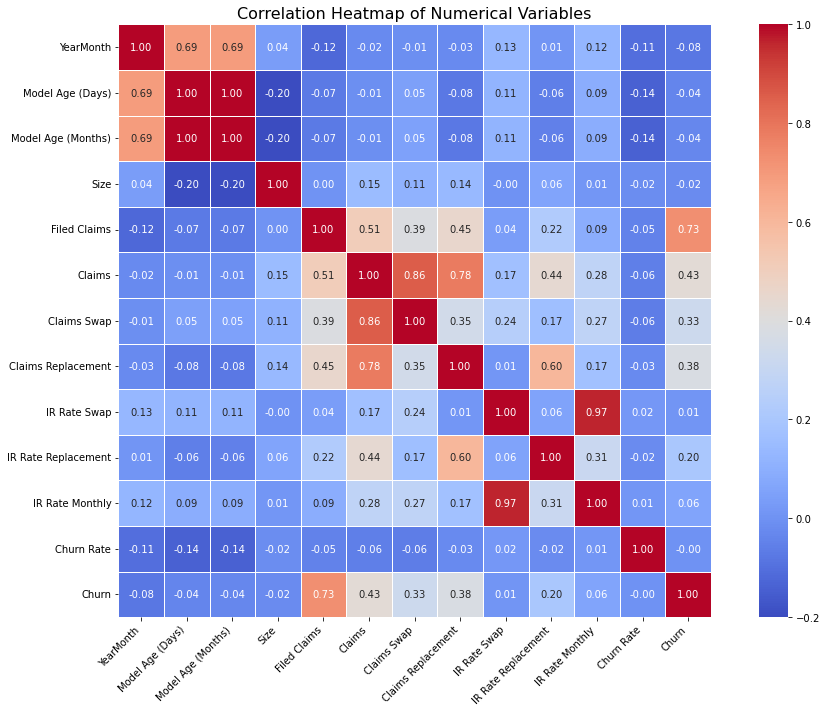

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 10))  # Adjust size as needed
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, square=True)
plt.title("Correlation Heatmap of Numerical Variables", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [92]:
# After analysis, these are the following chosen columns for model training
# Feature Selection
numerical_selected_columns = [
    'YearMonth',
    'Model Age (Days)',
    'Filed Claims',
    'Claims Swap',
    'Claims Replacement',
    'Churn',
    'Size',
]

categorical_select_columns = [
    'country', 'ModelFamily', 'Colour'
]

### 5. Categorical Encoding

In [93]:
# use pd.get_dummies()
# to convert your categorical columns into dummy/indicator variables:
# Encoding
df_encoded = pd.get_dummies(
    df[numerical_selected_columns + categorical_select_columns],
    columns=categorical_select_columns,
    drop_first=True  # To avoid dummy variable trap
)
df_encoded.head(5)

,YearMonth,Model Age (Days),Filed Claims,Claims Swap,Claims Replacement,Churn,Size,country_Nevada,country_Texas,ModelFamily_APPLE IPHONE 11 PRO,...,Colour_Gray,Colour_Green,Colour_Light Blue,Colour_Maroon,Colour_Orange,Colour_Pink,Colour_Purple,Colour_Red,Colour_Silver,Colour_White
0,201901,456,0.0,0.0,0.0,0,32,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,201902,484,0.0,0.0,0.0,0,32,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,201903,515,0.0,0.0,0.0,0,32,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,201904,545,0.0,0.0,0.0,0,32,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,201905,576,0.0,0.0,0.0,0,32,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
#testing
df_encoded.head()

,YearMonth,Model Age (Days),Filed Claims,Claims Swap,Claims Replacement,Churn,Size,country_Nevada,country_Texas,ModelFamily_APPLE IPHONE 11 PRO,...,Colour_Gray,Colour_Green,Colour_Light Blue,Colour_Maroon,Colour_Orange,Colour_Pink,Colour_Purple,Colour_Red,Colour_Silver,Colour_White
0,201901,456,0.0,0.0,0.0,0,32,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,201902,484,0.0,0.0,0.0,0,32,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,201903,515,0.0,0.0,0.0,0,32,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,201904,545,0.0,0.0,0.0,0,32,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,201905,576,0.0,0.0,0.0,0,32,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 6. Temporal Ordering

In [95]:
# TimeIndex
# Evaluate whether or not sorting by TimeIndex will improve the optimistic performance metrics(AME, RMSE, R square)
df_encoded['TimeIndex'] = pd.to_datetime(df_encoded['YearMonth'].astype(str), format='%Y%m')


In [96]:
# Target and Feature Split
# Step 1: Define your target (y)
y = df['Closing Subs Monthly']

# Step 2: Drop the target and TimeIndex to get features (X)
X = df_encoded
X = X.sort_values(by='TimeIndex').reset_index(drop=True)
X = df_encoded.drop(columns=['YearMonth', 'TimeIndex'])

print(f"\nThe number of input variables {len(X.columns)}")


The number of input variables 57


### 7. Feature Scaling

In [97]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Detect numerical features
numerical_features = [
    col for col in numerical_selected_columns if col in X.columns
]

# Scale only numerical features and preserve column names and index
X_scaled = scaler.fit_transform(X[numerical_features])
X[numerical_features] = pd.DataFrame(X_scaled, columns=numerical_features, index=X.index)

In [98]:
X.head(10)

,Model Age (Days),Filed Claims,Claims Swap,Claims Replacement,Churn,Size,country_Nevada,country_Texas,ModelFamily_APPLE IPHONE 11 PRO,ModelFamily_APPLE IPHONE 11 PRO MAX,...,Colour_Gray,Colour_Green,Colour_Light Blue,Colour_Maroon,Colour_Orange,Colour_Pink,Colour_Purple,Colour_Red,Colour_Silver,Colour_White
0,-0.239924,-0.388939,-0.44684,-0.23042,-0.50021,-1.659528,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.195821,-0.388939,-0.44684,-0.23042,-0.50021,-1.659528,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.146993,-0.388939,-0.44684,-0.23042,-0.50021,-1.659528,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.099740,-0.388939,-0.44684,-0.23042,-0.50021,-1.659528,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.050912,-0.388939,-0.44684,-0.23042,-0.50021,-1.659528,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,-0.003659,-0.388939,-0.44684,-0.23042,-0.50021,-1.659528,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0.045169,-0.388939,-0.44684,-0.23042,-0.50021,-1.659528,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0.093997,-0.388939,-0.44684,-0.23042,-0.50021,-1.659528,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0.141250,-0.388939,-0.44684,-0.23042,-0.50021,-1.659528,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0.190079,-0.388939,-0.44684,-0.23042,-0.50021,-1.659528,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 8. Data Splitting

In [100]:
# Split data for Training/ Validation & Testing
from sklearn.model_selection import train_test_split

# First: Train+Val and Test (70% / 30%)
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y, test_size=0.30, shuffle=False  # keep temporal order
)

# Then: Train and Validation (from the 70%)
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.105, shuffle=False  # 60/15/25 split
)

print(f"Train: {len(X_train)}, Validation: {len(X_val)}, Test: {len(X_test)}")

Train: 8158, Validation: 958, Test: 3908


##  Model Training & Evaluation

In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42)
}

# Train each model
for name, model in models.items():
    model.fit(X_train, y_train)

In [103]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Evaluation function
def evaluate(model, X, y):
    preds = model.predict(X)
    return {
        'MAE': mean_absolute_error(y, preds),
        'RMSE': mean_squared_error(y, preds, squared=False),
        'R2': r2_score(y, preds)
    }

# Validate each model
results = {}
for name, model in models.items():
    results[name] = evaluate(model, X_val, y_val)

# Show results
import pandas as pd
results_df = pd.DataFrame(results).T
print("Validation Results:")
print(results_df.round(3))

Validation Results:
                       MAE     RMSE     R2
Linear Regression  612.719  819.332  0.805
Random Forest      276.286  506.758  0.925
XGBoost            285.978  484.270  0.932


## Forecasting Future Demand Pipeline

In [104]:
len(models['XGBoost'].get_booster().feature_names)

57

In [105]:
numerical_features

['Model Age (Days)',
 'Filed Claims',
 'Claims Swap',
 'Claims Replacement',
 'Churn',
 'Size']

In [106]:
latest_data = df[df['YearMonth'] == 202311].copy()
categorical_selected_features = [
    'country', 'ModelFamily', 'Colour'
]
numerical_selected_features = ['Model Age (Days)',
 'Filed Claims',
 'Claims Swap',
 'Claims Replacement',
 'Churn',
 'Size']


In [107]:
# Filter only the latest data available (202311)
# Keep only the needed columns
cat_vars = categorical_select_columns + ['YearMonth']
future_base = latest_data[cat_vars].copy()

# Create future month rows
future_data = pd.concat([future_base]*2, ignore_index=True)

# Assign future months
future_data['YearMonth'] = [202312]*len(future_base) + [202401]*len(future_base)

future_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   country      478 non-null    object
 1   ModelFamily  478 non-null    object
 2   Colour       478 non-null    object
 3   YearMonth    478 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 15.1+ KB


In [108]:
# Manually define values (with robust conditional logic)
# Start by repeating from 202311 base
future_data['Model Age (Days)'] = latest_data['Model Age (Days)'].tolist() * 2
future_data['Size'] = latest_data['Size'].tolist() * 2  # Keep original sizes

# Conditionally add model age by future month
future_data.loc[future_data['YearMonth'] == 202312, 'Model Age (Days)'] += 31
future_data.loc[future_data['YearMonth'] == 202401, 'Model Age (Days)'] += 62

# Manually set other features
future_data['Filed Claims'] = 2
future_data['Claims Swap'] = 0
future_data['Claims Replacement'] = 0
future_data['Churn'] = 0

# Preview
future_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   country             478 non-null    object
 1   ModelFamily         478 non-null    object
 2   Colour              478 non-null    object
 3   YearMonth           478 non-null    int64 
 4   Model Age (Days)    478 non-null    int64 
 5   Size                478 non-null    int64 
 6   Filed Claims        478 non-null    int64 
 7   Claims Swap         478 non-null    int64 
 8   Claims Replacement  478 non-null    int64 
 9   Churn               478 non-null    int64 
dtypes: int64(7), object(3)
memory usage: 37.5+ KB


In [109]:
# Reorder to match expected feature set
ordered_cols = ["YearMonth"] + numerical_selected_features + categorical_selected_features
future_data = future_data[ordered_cols]

future_data.head()

,YearMonth,Model Age (Days),Filed Claims,Claims Swap,Claims Replacement,Churn,Size,country,ModelFamily,Colour
0,202312,2251,2,0,0,0,32,California,OPPO A12,Blue
1,202312,1251,2,0,0,0,32,Texas,OPPO A12,Blue
2,202312,2251,2,0,0,0,32,California,OPPO A15,Black
3,202312,2251,2,0,0,0,32,California,OPPO A15,White
4,202312,2251,2,0,0,0,64,California,OPPO A16,Blue


In [110]:
# Encode
future_encoded = pd.get_dummies(
    future_data,
    columns=categorical_selected_features,
    drop_first=True
)

# Reindex to match training columns
future_encoded = future_encoded.reindex(columns=X.columns, fill_value=0)


In [111]:
#To check whether to order of the future input variables matches with the trained input variables
print("Future column order matches:", all(future_encoded.columns == models['XGBoost'].get_booster().feature_names))

Future column order matches: True


In [112]:
# Scale numerical columns using fitted scaler
future_encoded[numerical_selected_features] = scaler.transform(future_encoded[numerical_selected_features])

In [113]:
# Make predictions using XG Boost
future_predictions = models['XGBoost'].predict(future_encoded)

# Output
forecast_result_1 = future_data[['YearMonth', 'country', 'ModelFamily']].copy()
forecast_result_1['Predicted Closing Subs Monthly'] = future_predictions

print(forecast_result_1.head(10))

   YearMonth     country ModelFamily  Predicted Closing Subs Monthly
0     202312  California    OPPO A12                      -43.704189
1     202312       Texas    OPPO A12                      129.454697
2     202312  California    OPPO A15                       68.050888
3     202312  California    OPPO A15                      -71.584686
4     202312  California    OPPO A16                      319.590729
5     202312  California    OPPO A16                      342.318634
6     202312       Texas    OPPO A16                      362.251984
7     202312       Texas    OPPO A16                      362.251984
8     202312       Texas    OPPO A16                      353.466492
9     202312       Texas    OPPO A16                      353.466492


In [114]:
forecast_result_1[forecast_result_1['Predicted Closing Subs Monthly'] <1].count()

YearMonth                         26
country                           26
ModelFamily                       26
Predicted Closing Subs Monthly    26
dtype: int64

In [115]:
forecast_result_1[forecast_result_1['Predicted Closing Subs Monthly'] >=1].count()

YearMonth                         452
country                           452
ModelFamily                       452
Predicted Closing Subs Monthly    452
dtype: int64

In [116]:
# Make predictions using Random Forest
rf_predictions = models['Random Forest'].predict(future_encoded)

# Output
forecast_result_2 = future_data[['YearMonth', 'country', 'ModelFamily']].copy()
forecast_result_2['Predicted Closing Subs Monthly'] = rf_predictions

# Preview the first few rows
print(forecast_result_2.head(10))

   YearMonth     country ModelFamily  Predicted Closing Subs Monthly
0     202312  California    OPPO A12                           90.09
1     202312       Texas    OPPO A12                           46.22
2     202312  California    OPPO A15                          114.09
3     202312  California    OPPO A15                          123.00
4     202312  California    OPPO A16                          279.42
5     202312  California    OPPO A16                          301.80
6     202312       Texas    OPPO A16                          243.67
7     202312       Texas    OPPO A16                          243.67
8     202312       Texas    OPPO A16                          237.61
9     202312       Texas    OPPO A16                          237.61


In [138]:
#To export out the forecasting file using XG Boost
forecast_result_1.to_csv('forecast_results_xg_boost.csv', index=False)

In [136]:
#To export out the forecasting file using Random Forest
forecast_result_2.to_csv('forecast_results_random_forest.csv', index=False)

In [117]:
forecast_result_2[forecast_result_2['Predicted Closing Subs Monthly'] <1].count()

YearMonth                         0
country                           0
ModelFamily                       0
Predicted Closing Subs Monthly    0
dtype: int64

In [118]:
forecast_result_2[forecast_result_2['Predicted Closing Subs Monthly'] >=1].count()

YearMonth                         478
country                           478
ModelFamily                       478
Predicted Closing Subs Monthly    478
dtype: int64

**Evaluation**

Random Forest predicts by averaging outputs from decision trees, and each tree makes predictions based on values seen in the training data. Since your training target (Closing Subs Monthly) was always positive, Random Forest will never predict values outside that range, including negatives.

In contrast, XGBoost is a boosting algorithm that learns by adding residual errors over many rounds. While powerful, this additive process can lead to extrapolation, especially on unfamiliar or sparse inputs — causing it to predict negative values even if the training targets were all positive.

So, while both models were trained on positive values:

🔒 Random Forest stays within bounds

⚠️ XGBoost can overshoot or undershoot, including negatives



##  Model Fine-Tuning

**Linear Regression for Regularisation using Ridge**

Why You Don’t Need Lasso Right Now:
Lasso's strength lies in automatic feature selection — it drives some coefficients to zero when they aren’t useful.

But you’ve already done that by:

Computing feature importances from 3 models
Dropping features below 1% importance across the board

So the main advantage of Lasso has already been manually engineered into your dataset.

In [119]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Step 1: Define detailed alpha grid
alphas = np.logspace(-3, 3, 50)  # From 0.001 to 1000 (log scale)

# Step 2: Initialize RidgeCV with R² scoring
ridge_model = RidgeCV(alphas=alphas, cv=5, scoring='r2')
ridge_model.fit(X_train, y_train)

# Step 3: Predict and evaluate
y_pred = ridge_model.predict(X_val)

print("Ridge Regression with Fine-Tuned Alpha")
print(f"Best alpha (λ): {ridge_model.alpha_:.4f}")
print(f"MAE:  {mean_absolute_error(y_val, y_pred):.2f}")
print(f"RMSE: {mean_squared_error(y_val, y_pred, squared=False):.2f}")
print(f"R²:   {r2_score(y_val, y_pred):.3f}")

Ridge Regression with Fine-Tuned Alpha
Best alpha (λ): 1000.0000
MAE:  549.48
RMSE: 828.89
R²:   0.801


In [120]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define the base model
xgb = XGBRegressor(random_state=42, n_jobs=-1)

# Define parameter space
xgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.4],
    'reg_lambda': [0.1, 1, 10],  # L2 regularization
    'reg_alpha': [0, 0.1, 1]     # L1 regularization
}


xgb_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=xgb_params,
    n_iter = 30,              # Try 30 combinations (adjust as needed) - It does not really affect the results
    scoring = 'r2',           # Optimize for R²
    cv=3,                   # 3-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1
)

xgb_search.fit(X_train, y_train)

best_xgb = xgb_search.best_estimator_
y_pred = best_xgb.predict(X_val)

print("XGBoost Tuned Performance:")
print(f"Best Params: {xgb_search.best_params_}")
print(f"MAE:  {mean_absolute_error(y_val, y_pred):.2f}")
print(f"RMSE: {mean_squared_error(y_val, y_pred, squared=False):.2f}")
print(f"R²:   {r2_score(y_val, y_pred):.3f}")

Fitting 3 folds for each of 30 candidates, totalling 90 fits
XGBoost Tuned Performance:
Best Params: {'subsample': 0.8, 'reg_lambda': 0.1, 'reg_alpha': 0.1, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.8}
MAE:  275.94
RMSE: 465.31
R²:   0.937


In [121]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Base model
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

# Refined parameter space
rf_params = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 0.3, 0.5],
    'bootstrap': [True, False]
}

rf_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=rf_params,
    n_iter=30,              # Increase the number of iteration from 30 to 50 make the performance metrics outcome worse 
    scoring='r2',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

rf_search.fit(X_train, y_train)

# Best model
best_rf = rf_search.best_estimator_
y_pred_rf = best_rf.predict(X_val)

# Evaluate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("📈 Random Forest Tuned Performance:")
print(f"Best Params: {rf_search.best_params_}")
print(f"MAE:  {mean_absolute_error(y_val, y_pred_rf):.2f}")
print(f"RMSE: {mean_squared_error(y_val, y_pred_rf, squared=False):.2f}")
print(f"R²:   {r2_score(y_val, y_pred_rf):.3f}")

Fitting 3 folds for each of 30 candidates, totalling 90 fits
📈 Random Forest Tuned Performance:
Best Params: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 0.5, 'max_depth': 15, 'bootstrap': True}
MAE:  273.29
RMSE: 468.46
R²:   0.936


## Feature Importance & Reduction

In [122]:
feature_names = X.columns

In [123]:
# Extract model
lr_model = models['Linear Regression']

# Create a Series of absolute coefficient values
lr_importance_raw = pd.Series(lr_model.coef_, index=feature_names).abs()

# Normalize to sum to 1 → like percent contributions
lr_importance_pct = lr_importance_raw / lr_importance_raw.sum()

# Combine both into a DataFrame
lr_importance_df = pd.DataFrame({
    'Coefficient (Abs)': lr_importance_raw,
    'Importance (%)': lr_importance_pct
})

# Sort and display top 10
lr_importance_df = lr_importance_df.sort_values(by='Coefficient (Abs)', ascending=False)
print(lr_importance_df.head(10))

                                      Coefficient (Abs)  Importance (%)
ModelFamily_OPPO A15                        2347.115170        0.106016
ModelFamily_OPPO A12                        1234.745106        0.055772
ModelFamily_OPPO A5                         1085.333597        0.049023
ModelFamily_SAMSUNG GALAXY A10               992.431955        0.044827
Churn                                        924.268991        0.041748
ModelFamily_SAMSUNG GALAXY S21 ULTRA         915.033860        0.041331
Filed Claims                                 898.934849        0.040604
ModelFamily_SAMSUNG GALAXY S22 ULTRA         874.744129        0.039511
ModelFamily_OPPO A16                         872.208085        0.039397
ModelFamily_SAMSUNG GALAXY S20 ULTRA         869.161940        0.039259


In [124]:
rf_model = models['Random Forest']

rf_importance = pd.Series(rf_model.feature_importances_, index=feature_names)
rf_importance.sort_values(ascending=False).head(10)

Filed Claims                           0.538721
Churn                                  0.253465
Model Age (Days)                       0.052934
ModelFamily_OPPO A15                   0.039340
ModelFamily_APPLE IPHONE 12 PRO MAX    0.022629
country_Texas                          0.010502
Size                                   0.010447
Claims Swap                            0.009646
Claims Replacement                     0.008889
ModelFamily_OPPO A12                   0.008089
dtype: float64

In [125]:
xgb_model = models['XGBoost']

xgb_importance = pd.Series(xgb_model.feature_importances_, index=feature_names)
xgb_importance.sort_values(ascending=False).head(10)

ModelFamily_OPPO A15                    0.457656
Filed Claims                            0.143957
ModelFamily_OPPO A12                    0.060884
ModelFamily_APPLE IPHONE 12 PRO MAX     0.054527
ModelFamily_SAMSUNG GALAXY A10          0.031311
Churn                                   0.030117
ModelFamily_OPPO A3S                    0.024374
ModelFamily_SAMSUNG GALAXY S20 ULTRA    0.023430
Colour_Blue                             0.021631
ModelFamily_OPPO A16                    0.020790
dtype: float32

In [126]:
# Normalize LR importance 
lr_low = lr_importance_pct[lr_importance_pct < 0.01].index
rf_low = rf_importance[rf_importance < 0.01].index
xgb_low = xgb_importance[xgb_importance < 0.01].index

# Intersect to find features below 1% in all models
low_importance_features = set(lr_low) & set(rf_low) & set(xgb_low)

print("Features to drop (below 1% in all models):")
print(sorted(low_importance_features))

print(f"\nNumber of Feature to be dropped: {len(low_importance_features)}")

Features to drop (below 1% in all models):
['Claims Replacement', 'Colour_Brown', 'Colour_Glow', 'Colour_Green', 'Colour_Light Blue', 'Colour_Orange', 'Colour_Pink', 'Colour_Purple', 'Colour_Silver', 'ModelFamily_APPLE IPHONE 11 PRO MAX', 'ModelFamily_APPLE IPHONE 12', 'ModelFamily_APPLE IPHONE 12 PRO', 'ModelFamily_APPLE IPHONE 13', 'ModelFamily_APPLE IPHONE 13 PRO', 'ModelFamily_APPLE IPHONE 13 PRO MAX', 'ModelFamily_APPLE IPHONE 14 PRO', 'ModelFamily_APPLE IPHONE 14 PRO MAX', 'ModelFamily_APPLE IPHONE 7 PLUS', 'ModelFamily_APPLE IPHONE X', 'ModelFamily_APPLE IPHONE XR', 'ModelFamily_APPLE IPHONE XS', 'ModelFamily_APPLE IPHONE XS MAX', 'ModelFamily_OPPO A92', 'ModelFamily_SAMSUNG GALAXY NOTE 10 PLUS', 'ModelFamily_SAMSUNG GALAXY NOTE 20 ULTRA 5G', 'ModelFamily_SAMSUNG GALAXY NOTE 9', 'country_Nevada']

Number of Feature to be dropped: 27


In [127]:
X_reduced = X.drop(columns=low_importance_features)

In [128]:
# Split data for Training/ Validation & Testing
from sklearn.model_selection import train_test_split

# First: Train+Val and Test (70% / 30%)
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X_reduced, y, test_size=0.30, shuffle=False  # keep temporal order
)

# Then: Train and Validation (from the 70%)
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.105, shuffle=False  # 60/15/25 split
)

print(f"Train: {len(X_train)}, Validation: {len(X_val)}, Test: {len(X_test)}")

Train: 8158, Validation: 958, Test: 3908


In [129]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42)
}

# Train each model
for name, model in models.items():
    model.fit(X_train, y_train)

#get the validation accuracy for each model - fine tuning it using hyper parameter

In [130]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Evaluation function
def evaluate(model, X, y):
    preds = model.predict(X)
    return {
        'MAE': mean_absolute_error(y, preds),
        'RMSE': mean_squared_error(y, preds, squared=False),
        'R2': r2_score(y, preds)
    }

# Validate each model
results = {}
for name, model in models.items():
    results[name] = evaluate(model, X_val, y_val)

# Show results
import pandas as pd
results_df = pd.DataFrame(results).T
print("Validation Results:")
print(results_df.round(3))

Validation Results:
                       MAE     RMSE     R2
Linear Regression  613.563  827.911  0.801
Random Forest      278.259  518.114  0.922
XGBoost            294.511  502.112  0.927
